In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


# Required Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Downloading and Organizing Data

In [3]:
# Lead-in: Download and load the CIFAR-10 dataset.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# Understanding Image Data

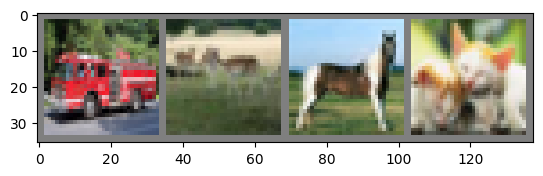

In [4]:
# Lead-in: Display a batch of images from CIFAR-10.
dataiter = iter(trainloader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images[:4]))
# This code displays the first four images in a batch, helping us see what the model will learn from.

# Data Augmentation and Preprocessing

In [5]:
#  Define a data augmentation pipeline.
augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Transfer Learning for Image Classification

In [6]:
#  Load a pre-trained ResNet-18 and adapt it for CIFAR-10.
import torch.nn as nn

model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace final layer

/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Training the Model

In [7]:
# Lead-in: Train only the final layer of the model.
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Training loop (simplified for demonstration)
for epoch in range(2):  # Use more epochs for real training
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Object Detection with Pre-trained Models

/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Detected classes: tensor([ 2,  1, 31, 62,  1, 31,  1, 33,  1,  1, 31, 19, 27, 33,  1,  1,  7, 31,
        31, 62, 62,  1,  1, 15, 51,  1, 62,  1,  2, 62, 62,  1, 31, 27, 21,  1,
        62,  1, 31, 33, 62,  1, 31, 31,  2,  2, 31, 31,  1,  1, 31,  1,  1, 62,
         1,  1,  1, 18, 22,  1,  1,  1, 15,  1,  1,  1,  1, 31, 62,  1, 62])
Bounding boxes: tensor([[4.1036e+02, 9.6325e+02, 9.7937e+02, 1.3198e+03],
        [4.7454e+02, 6.2220e+02, 6.4234e+02, 9.8298e+02],
        [1.9112e+01, 7.6240e+02, 1.7963e+02, 9.8396e+02],
        [9.9956e-01, 1.0188e+03, 7.5533e+01, 1.4255e+03],
        [3.7641e+02, 7.1668e+02, 4.5238e+02, 9.6319e+02],
        [5.4441e-02, 5.7502e+02, 1.1797e+02, 7.7728e+02],
        [2.3364e+02, 6.7834e+02, 4.5548e+02, 1.1641e+03],
        [4.0682e+02, 9.3042e+02, 5.7946e+02, 1.0289e+03],
        [3.0442e+02, 6.7138e+02, 4.3230e+02, 9.0915e+02],
        [8.2377e+02, 8.4093e+02, 8.5826e+02, 9.1474e+02],
        [4.7270e+02, 8.2405e+02, 5.3583e+02, 9.0613e+02],
        [8.

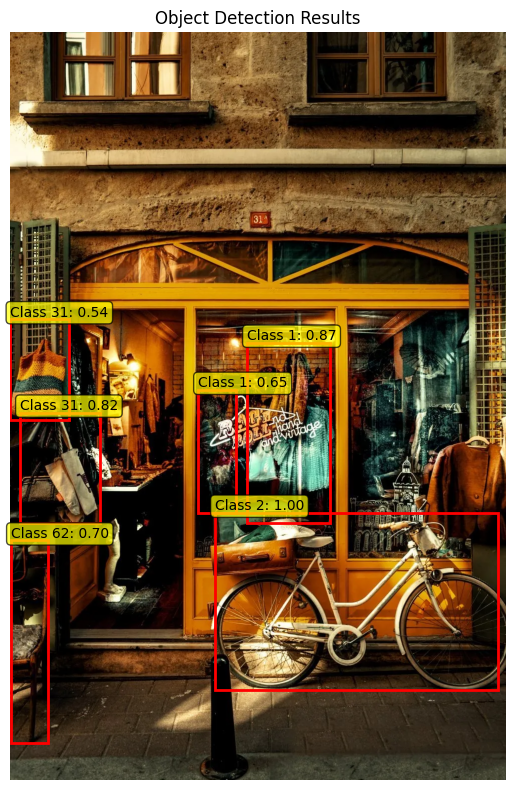

In [8]:
# Lead-in: Use a pre-trained Faster R-CNN to detect objects in an image.
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt
import matplotlib.patches as patches

detector = fasterrcnn_resnet50_fpn(pretrained=True)
detector.eval()

img = Image.open('sample.jpg')
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img)
with torch.no_grad():
    prediction = detector([img_tensor])[0]
print("Detected classes:", prediction['labels'])
print("Bounding boxes:", prediction['boxes'])

# Add visualization with minimal code changes
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)

# Filter detections by confidence (optional)
confidence_threshold = 0.5
scores = prediction['scores']
boxes = prediction['boxes']
labels = prediction['labels']

# Draw bounding boxes
for box, score, label in zip(boxes, scores, labels):
    if score > confidence_threshold:  # Only show confident detections
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        
        # Create rectangle patch
        rect = patches.Rectangle((x1, y1), width, height, 
                               linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Add label
        ax.text(x1, y1-5, f'Class {label.item()}: {score:.2f}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                fontsize=10)

ax.axis('off')
plt.title('Object Detection Results')
plt.tight_layout()
plt.show()

# Image Segmentation with Pre-trained Models

/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


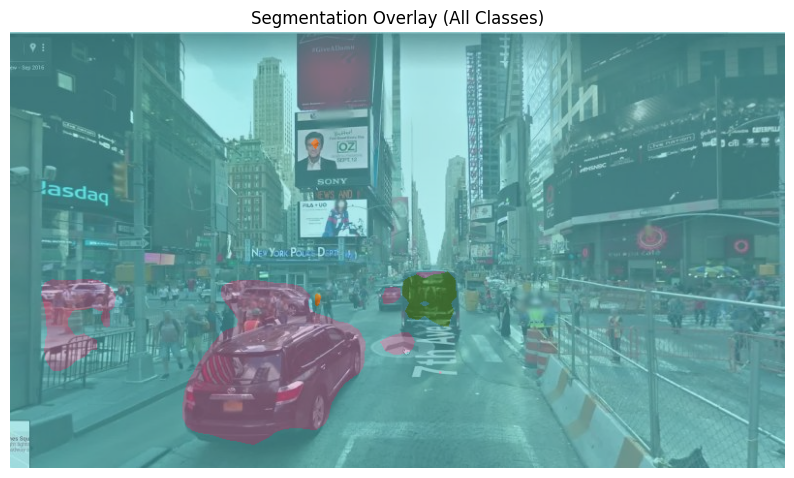

In [9]:
from torchvision.models.segmentation import deeplabv3_resnet50
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load and preprocess the image
img = Image.open('sample2.jpg').convert('RGB')
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)

# Get the segmentation mask
segmenter = deeplabv3_resnet50(pretrained=True)
segmenter.eval()
with torch.no_grad():
    output = segmenter(img_tensor)['out'][0]
mask = output.argmax(0).byte().cpu().numpy()

# Convert original image to numpy and resize to match mask
img_np = np.array(img)
# Resize the original image to match the mask size
img_resized = np.array(Image.fromarray(img_np).resize((mask.shape[1], mask.shape[0])))

# Create a color mask with random colors for each class
np.random.seed(42)
num_classes = mask.max() + 1
colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)
color_mask = colors[mask]

# Blend the resized image and the color mask
alpha = 0.5
overlay = (alpha * img_resized + (1 - alpha) * color_mask).astype(np.uint8)

plt.figure(figsize=(10, 6))
plt.imshow(overlay)
plt.axis('off')
plt.title('Segmentation Overlay (All Classes)')
plt.show()

# Visualizing Model Predictions

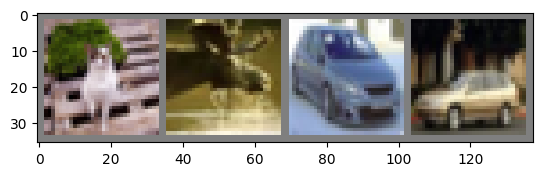

Predicted: frog frog automobile horse


In [10]:
# Lead-in: Show images with predicted labels.
outputs = model(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images[:4]))
print('Predicted:', ' '.join(f'{trainset.classes[p]}' for p in predicted[:4]))

# Working with Custom Datasets

In [11]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
# For this code to run, you need the folders and class folders inside each train and val folders, with images inside each folder

train_data = ImageFolder('data/train', transform=transform)
val_data = ImageFolder('data/val', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

FileNotFoundError: Couldn't find any class folder in data/train.

# Evaluation Model Performance

Accuracy: 41.43%


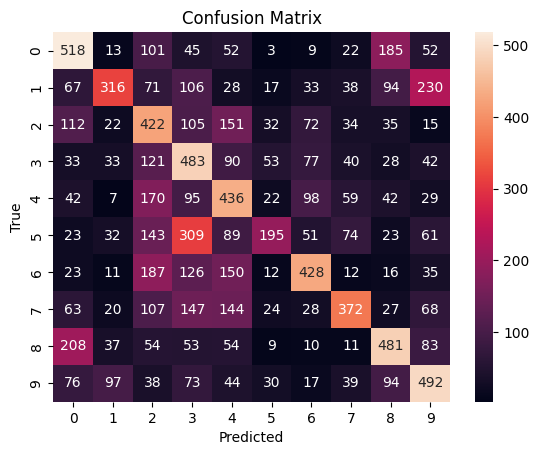

In [ ]:
# Calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy: {100 * correct / total:.2f}%')

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualizing Object Detection

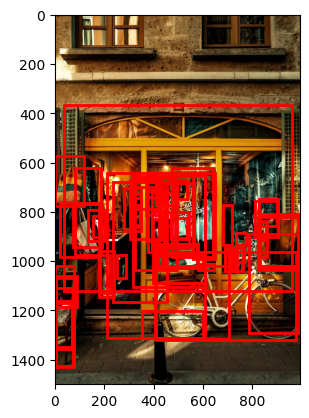

In [ ]:
# Lead-in: Draw bounding boxes on detected objects.
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(img)
for box in prediction['boxes']:
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

# Evaluating Model Performance

# Mini Project 2: Object Detection

/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


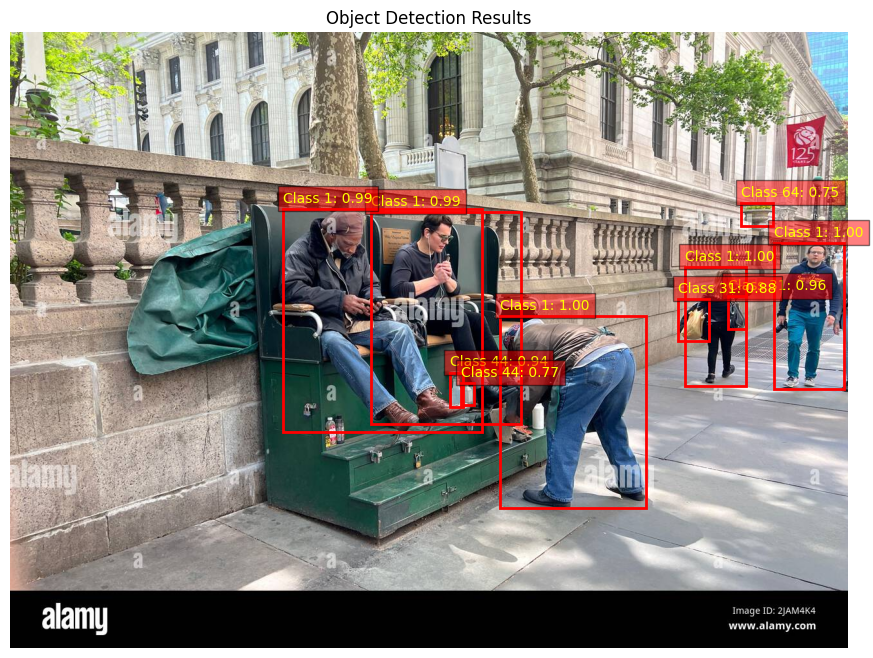

In [13]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import ToTensor
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from io import BytesIO

# 1. Download a sample image from the web
url = "https://c7.alamy.com/comp/2JAM4K4/shoeshine-stand-on-42nd-stgreet-at-5th-avenue-outside-the-new-york-public-library-in-manhattan-2JAM4K4.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# 2. Convert to tensor
img_tensor = ToTensor()(img)

# 3. Load pre-trained object detector
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 4. Run detection
with torch.no_grad():
    prediction = model([img_tensor])[0]

# 5. Visualization
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)
for box, score, label in zip(prediction['boxes'], prediction['scores'], prediction['labels']):
    if score > 0.7:
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 10, f'Class {label.item()}: {score:.2f}', color='yellow',
                fontsize=10, bbox=dict(facecolor='red', alpha=0.5))
ax.axis('off')
plt.title('Object Detection Results')
plt.show()